## Observations and Insights 

### 1. Capomulin is more suitable to choose if a single “Drug Regimen” sample is required.
From the `Summary Statistics` table, the standard deviation of Capomulin is lower than others. <br>
A low standard deviation shows that the data are clustered closely around the mean (more reliable), and a higher one shows that the data is widely spread (less reliable).<br>

### 2. Capomulin and Ramicane are probably the best treatments
As can be seen from the boxplot, the final tumor size of Capomulin and Ramicane was lower than the others among the 4 treatments selected.<br>
Capomulin and Ramicane decreased Tumors may work best, considering that the starting tumor size of each mouse was 45mm3.<br>
`The reason for adding a "probably" to the conclusion is that in the following studies, there is a strong positive correlation between the mice weight and the tumor volume. The average mouse weight of Capomulin and Ramicane was 20.06, and others was 27.65. Therefore, this conclusion needs to be further analyzed after excluding the effect of weight.`
### 3. Mice weight is strongly positively correlated with tumor volume
In the scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen, the `correlation` is 0.84 and the `R-squared` value is 0.70, which means that:<br>
1. There is a strong positive correlation between the weight of mouse and the volumn of the tumo. <br>
2. 70% of the data fit the regression model.<br>

The `coefficient of correlation`, is represented by "r", can take any values between -1.00 to +1.00. An `r` equals 1 or -1 is called a perfect positive/negative correlation. Typically, an `r` greater than +0.8 or less than -0.8 are considered to be strongly correlated between two variables. Otherwise it indicates a weak correlation between variables. When `r` is 0.00, there is no correlation.<br>

`R-squared` can take any values between 0 to 1, and it shows how well the data fit the regression model (the goodness of fit).In our case, `R-squared` is 0.7, which means 70% of the data fit the regression model. This further proves the conclusion we draw by `r`, the data is a strong effect size.<br>


#### Input the data

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combine_df = pd.merge(mouse_metadata, study_results,how = "outer" ,on=["Mouse ID"])

# Display the data table for preview
Combine_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


#### Check if the data needs to be clearned

In [2]:
Combine_df.count() 

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
Combine_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

#### Remove the unreliable results

In [4]:
# Checking the number of mice.
len(Combine_df["Mouse ID"].unique())

249

In [5]:
# Get the mouse ID list
MouseIDList = Combine_df["Mouse ID"].unique().tolist()
MouseIDList

['k403',
 's185',
 'x401',
 'm601',
 'g791',
 's508',
 'f966',
 'm546',
 'z578',
 'j913',
 'u364',
 'n364',
 'y793',
 'r554',
 'm957',
 'c758',
 't565',
 'a644',
 'i177',
 'j989',
 'i738',
 'a520',
 'w914',
 'r811',
 'g288',
 'i334',
 'q610',
 'd251',
 'l897',
 'c458',
 'b742',
 'b128',
 'j246',
 'a411',
 'j119',
 'w150',
 'v923',
 'g316',
 's710',
 'l509',
 'r944',
 'e662',
 'u196',
 'q597',
 'a444',
 'i557',
 'r921',
 'w678',
 'y449',
 'a203',
 'a251',
 'a262',
 'a275',
 'a366',
 'a401',
 'a457',
 'a492',
 'a577',
 'a685',
 'a699',
 'a788',
 'a818',
 'a897',
 'a963',
 'b313',
 'b447',
 'b487',
 'b559',
 'b759',
 'b879',
 'c139',
 'c264',
 'c282',
 'c302',
 'c326',
 'c402',
 'c559',
 'c580',
 'c757',
 'c766',
 'c819',
 'c832',
 'c895',
 'c927',
 'd133',
 'd164',
 'd474',
 'e213',
 'e227',
 'e291',
 'e476',
 'e584',
 'f129',
 'f234',
 'f278',
 'f345',
 'f394',
 'f436',
 'f545',
 'f932',
 'f993',
 'g107',
 'g296',
 'g497',
 'g558',
 'g570',
 'g867',
 'g989',
 'h246',
 'h333',
 'h428',
 

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated = Combine_df[Combine_df[["Mouse ID","Timepoint"]].duplicated()]
DuplicatedMouseIDList = Duplicated["Mouse ID"].unique().tolist()
DuplicatedMouseIDList
print(*DuplicatedMouseIDList, sep=",")


g989


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicatedonID = Combine_df[Combine_df["Mouse ID"].isin(DuplicatedMouseIDList)]
DuplicatedonID.to_csv(r'output/Duplicated on ID.csv', index = False)
DuplicatedonID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MouseClearList = MouseIDList
for X in DuplicatedMouseIDList:
    MouseClearList.remove(X)
FinalData_df = Combine_df[Combine_df["Mouse ID"].isin(MouseClearList)]
FinalData_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
len(FinalData_df['Mouse ID'].unique())

248

In [10]:
FinalData_df.to_csv(r'output/Final Results.csv', index = False)
FinalData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

#### Summary Statistics by Groupby

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = FinalData_df.groupby(FinalData_df["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = FinalData_df.groupby(FinalData_df["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = FinalData_df.groupby(FinalData_df["Drug Regimen"])["Tumor Volume (mm3)"].var()
standarddeviation = FinalData_df.groupby(FinalData_df["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM = FinalData_df.groupby(FinalData_df["Drug Regimen"])["Tumor Volume (mm3)"].sem()

SummaryGoupby = pd.DataFrame({"Tumor Volume (mm3) - Average":mean,
                              "Tumor Volume (mm3) - Median":median,
                              "Tumor Volume (mm3) - Variance":variance,
                              "Tumor Volume (mm3) - Standard Deviation":standarddeviation,
                              "Tumor Volume (mm3) - SEM":SEM
                             })
SummaryGoupby

,Tumor Volume (mm3) - Average,Tumor Volume (mm3) - Median,Tumor Volume (mm3) - Variance,Tumor Volume (mm3) - Standard Deviation,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#### Summary Statistics by Groupby & Agg

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

SummaryGoupbyAgg = FinalData_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
SummaryGoupbyAgg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

#### Bar Charts - Pandas

<IPython.core.display.Javascript object>


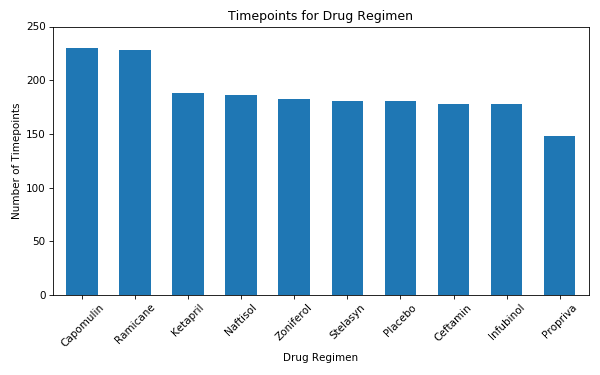

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Get the data
TimepointsforDrugRegimen_Pandas = FinalData_df["Drug Regimen"].value_counts()

# Creat the chart
TimepointsforDrugRegimen_Pandas.plot(kind="bar", figsize=(8,5),rot=45,width=0.6)

# Set appearance
plt.title("Timepoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.ylim(0, 250)
plt.show()
plt.tight_layout()

# Save the chart
plt.savefig("output/BarChart - Timepoints for Drug Regimen - Pandas")

#### Bar Charts - pyplot

<IPython.core.display.Javascript object>


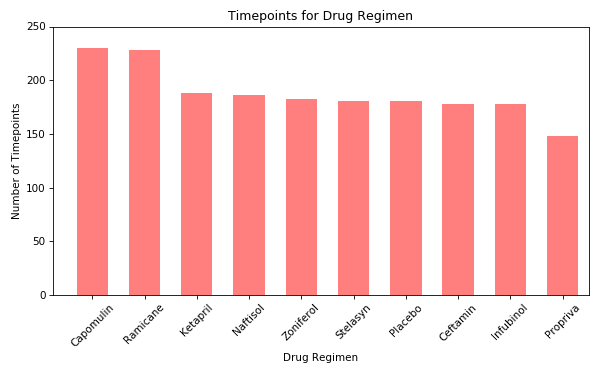

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Get the data
TimepointsforDrugRegimen_pyplot= pd.DataFrame(FinalData_df["Drug Regimen"].value_counts().reset_index().rename(columns={"Drug Regimen":"Number of Timepoint",'index': 'Drug Regimen'}))

# Creat the chart
x_axis = np.arange(len(TimepointsforDrugRegimen_pyplot))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, TimepointsforDrugRegimen_pyplot["Number of Timepoint"], color='r', alpha=0.5, align="center",width=0.6)
plt.xticks(tick_locations, TimepointsforDrugRegimen_pyplot["Drug Regimen"], rotation=45)
plt.xlim(-0.75, len(TimepointsforDrugRegimen_pyplot)-.5)
plt.ylim(0, 250)

# Set appearance
plt.title("Timepoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()
plt.tight_layout()

# Save the chart
plt.savefig("output/BarChart - Timepoints for Drug Regimen - Pyplot")

#### Pie Charts - Pandas

<IPython.core.display.Javascript object>


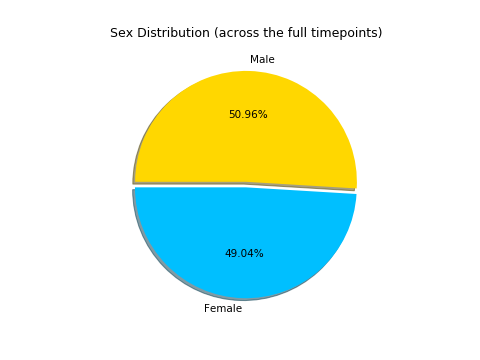

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get the data
Sex_Pandas = FinalData_df["Sex"].value_counts(sort=False)

# Creat the chart
explode = (0.05, 0)
Sex_Pandas.plot(kind = "pie", explode=explode, colors = ["deepskyblue", "gold"],autopct="%1.2f%%",shadow=True,startangle=180)

# Set appearance
plt.title("Sex Distribution (across the full timepoints)")
plt.axis("off")
plt.show()

# Save the chart
plt.savefig("output/PieChart - Sex Distribution (across the full timepoints) - Pandas")

#### Pie Charts - Pyplot

<IPython.core.display.Javascript object>


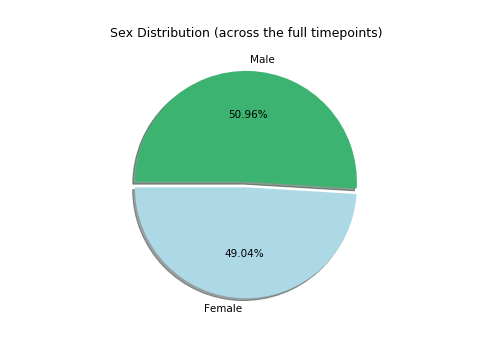

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the data
Sex_pyplot= pd.DataFrame(FinalData_df["Sex"].value_counts(sort=False).reset_index().rename(columns={"Sex":"Total",'index': 'Sex'}))

# Creat the chart
explode = (0.05, 0)
plt.pie(Sex_pyplot["Total"], labels=Sex_pyplot["Sex"], explode=explode, colors = ["lightblue", "mediumseagreen"],autopct="%1.2f%%",shadow=True,startangle=180)

# Set appearance
plt.title("Sex Distribution (across the full timepoints)")
plt.show()

# Save the chart
plt.savefig("output/PieChart - Sex Distribution (across the full timepoints) - Pyplot")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
MaxTimepoint = pd.DataFrame(FinalData_df.groupby(FinalData_df["Mouse ID"])["Timepoint"].max()).reset_index()
MaxTimepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [18]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
FinalTumorVolume_df = MaxTimepoint.merge(FinalData_df, how="inner", left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])
FinalTumorVolume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    #Determine outliers using upper and lower bounds  

# Prepare data sources for 4 treatment regimens
CapomulinLastPoint_df = FinalTumorVolume_df.loc[(FinalTumorVolume_df["Drug Regimen"]=="Capomulin"),:]
RamicaneLastPoint_df = FinalTumorVolume_df.loc[(FinalTumorVolume_df["Drug Regimen"]=="Ramicane"),:]
InfubinolLastPoint_df = FinalTumorVolume_df.loc[(FinalTumorVolume_df["Drug Regimen"]=="Infubinol"),:]
CeftaminLastPoint_df = FinalTumorVolume_df.loc[(FinalTumorVolume_df["Drug Regimen"]=="Ceftamin"),:]

#### Capomulin Treatments:

In [20]:
quartiles = CapomulinLastPoint_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("\033[1m"+"Capomulin Treatments: "+"\033[0m")
print(f"The lower quartile of Capomulin treatments is: {lowerq}, the upper quartile is: {upperq} ")
print(f"Values below {lower_bound} could be outliers, above {upper_bound} could be outliers.")

Capomulin Treatments: 
The lower quartile of Capomulin treatments is: 32.37735684, the upper quartile is: 40.1592203 
Values below 20.70456164999999 could be outliers, above 51.83201549 could be outliers.


#### Ramicane Treatments:

In [21]:
quartiles = RamicaneLastPoint_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("\033[1m"+"Ramicane Treatments: "+"\033[0m")
print(f"The lower quartile of Ramicane treatments is: {lowerq}, the upper quartile is: {upperq} ")
print(f"Values below {lower_bound} could be outliers, above {upper_bound} could be outliers.")

Ramicane Treatments: 
The lower quartile of Ramicane treatments is: 31.56046955, the upper quartile is: 40.65900627 
Values below 17.912664470000003 could be outliers, above 54.30681135 could be outliers.


#### Infubinol Treatments:

In [22]:
quartiles = InfubinolLastPoint_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("\033[1m"+"Infubino Treatments: "+"\033[0m")
print(f"The lower quartile of Infubinol treatments is: {lowerq}, the upper quartile is: {upperq} ")
print(f"Values below {lower_bound} could be outliers, above {upper_bound} could be outliers.")

Infubino Treatments: 
The lower quartile of Infubinol treatments is: 54.04860769, the upper quartile is: 65.52574285 
Values below 36.83290494999999 could be outliers, above 82.74144559000001 could be outliers.


#### Ceftamin Treatments:

In [23]:
quartiles = CeftaminLastPoint_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("\033[1m"+"Ceftamin Treatments: "+"\033[0m")
print(f"The lower quartile of Ceftamin treatments is: {lowerq}, the upper quartile is: {upperq} ")
print(f"Values below {lower_bound} could be outliers, above {upper_bound} could be outliers.")

Ceftamin Treatments: 
The lower quartile of Ceftamin treatments is: 48.72207785, the upper quartile is: 64.29983003 
Values below 25.355449580000002 could be outliers, above 87.66645829999999 could be outliers.


#### Create the Chart

<IPython.core.display.Javascript object>


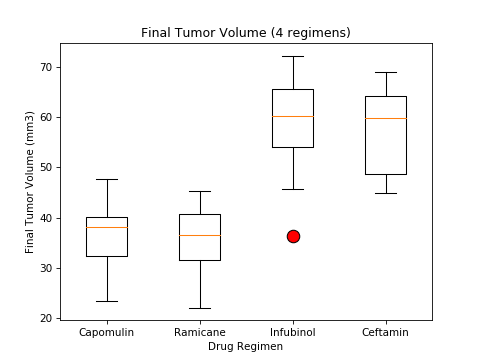

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Get the data
Treatments = [CapomulinLastPoint_df["Tumor Volume (mm3)"], RamicaneLastPoint_df["Tumor Volume (mm3)"], InfubinolLastPoint_df["Tumor Volume (mm3)"], CeftaminLastPoint_df["Tumor Volume (mm3)"]]

# Creat the chart
fig1, ax1 = plt.subplots()
ax1.boxplot(Treatments, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],flierprops=dict(marker='o', markerfacecolor='r', markersize=12))

# Set appearance
ax1.set_title("Final Tumor Volume (4 regimens)")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

# Save the chart
plt.savefig("output/BoxPlot - Final Tumor Volume (4 regimens)")

## Line and Scatter Plots

<IPython.core.display.Javascript object>


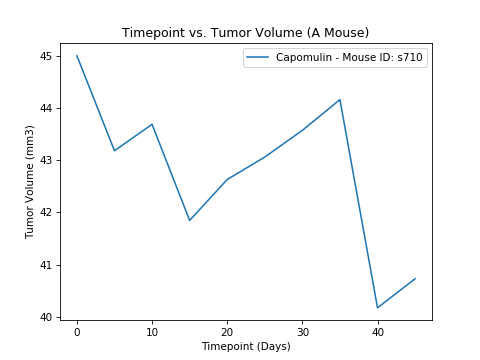

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Get the data
FinalCapomulinAMouse_df = FinalData_df.loc[(FinalData_df["Drug Regimen"]=="Capomulin")&(FinalData_df["Mouse ID"]=="s710"),:]
CapomulinAMouse_df = FinalCapomulinAMouse_df[["Tumor Volume (mm3)"]].groupby(FinalCapomulinAMouse_df[["Tumor Volume (mm3)","Timepoint"]]["Timepoint"]).mean()

# Creat the chart
CapomulinAMouse_df.plot(kind="line")

# Set appearance
plt.legend(["Capomulin - Mouse ID: s710"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs. Tumor Volume (A Mouse)")
plt.show()

# Save the chart
plt.savefig("output/LineChart - Timepoint vs Tumor Volume (A Mouse)")

<IPython.core.display.Javascript object>


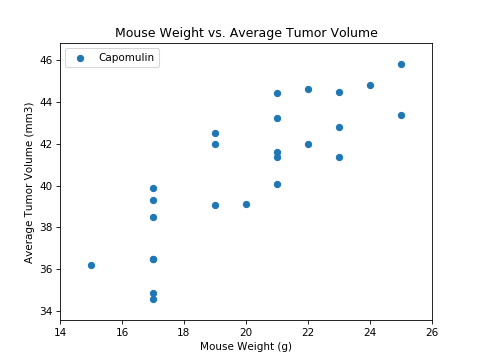

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Get the data
FinalCapomulin_df = FinalData_df.loc[(FinalData_df["Drug Regimen"]=="Capomulin"),:]
CapomulinAverageVolume_df = pd.DataFrame(FinalCapomulin_df.groupby(FinalCapomulin_df["Mouse ID"]).mean())
CapomulinAverageVolume_df

# Creat the chart
plt.scatter(CapomulinAverageVolume_df["Weight (g)"], CapomulinAverageVolume_df["Tumor Volume (mm3)"])

# Set appearance
plt.xlim(CapomulinAverageVolume_df["Weight (g)"].min()-1, CapomulinAverageVolume_df["Weight (g)"].max()+1)
plt.ylim(CapomulinAverageVolume_df["Tumor Volume (mm3)"].min()-1, CapomulinAverageVolume_df["Tumor Volume (mm3)"].max()+1)
plt.legend(["Capomulin"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()

# Save the chart
plt.savefig("output/ScatterPlot - Mouse Weight vs Average Tumor Volume")

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
Weight = CapomulinAverageVolume_df["Weight (g)"]
AverageVolume = CapomulinAverageVolume_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(Weight,AverageVolume)
print(f"The coefficient of correlation between both mouse weight and average tumor volume is {round(correlation[0],2)}")

The coefficient of correlation between both mouse weight and average tumor volume is 0.84


<IPython.core.display.Javascript object>


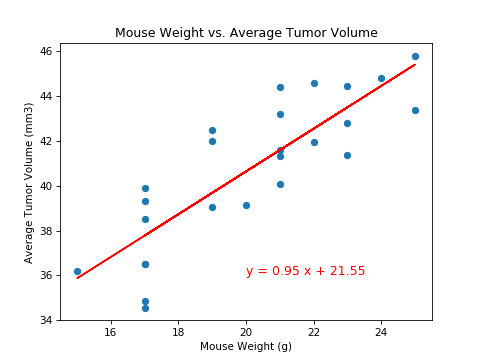

The r-squared is: 0.71


In [28]:
# Print out the r-squared value along with the plot.
x_values = Weight
y_values = AverageVolume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")

# Set appearance
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse Weight vs. Average Tumor Volume')
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()

# Save the chart
plt.savefig("output/ScatterPlot - Mouse Weight vs Average Tumor Volume (With Linear Regression Model)")